In [25]:

import cv2
file_path = r"D:\ML1BootCamp\Day9_filehandling_imageAnotation\new\6.txt"

try:
    with open(file_path, 'r') as file:
        content = file.read()
        print("File content:")
        print(content)


        imgpath = r'D:\ML1BootCamp\Day9_filehandling_imageAnotation\cat_dog\6.jpeg'

        # Alternatively, you can read line by line
        file.seek(0)  
        print("\nFile content line by line:")
        for line in file:
            l= line.split(' ')
            print(l) 
            print(l[1]) 
            
        

        x1=float(l[1])
        y1=float(l[2])
        x2=float(l[3])
        y2=float(l[4])

        img =cv2.imread(imgpath)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.imshow('img',img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

except FileNotFoundError:
    print(f"File not found: {file_path}")

except Exception as e:
    print(f"An error occurred: {e}")


File content:
0 0.324165 0.424779 0.223969 0.513274
1 0.569745 0.592920 0.153242 0.318584


File content line by line:
['0', '0.324165', '0.424779', '0.223969', '0.513274\n']
0.324165
['1', '0.569745', '0.592920', '0.153242', '0.318584\n']
0.569745
0.569745 0.59292 0.153242 0.318584


In [42]:
import os
import cv2

def draw_annotation(img, annotations):
    for annotation in annotations:
        parts = annotation.split()
        class_label = int(parts[0])
        x_center, y_center, width, height = map(float, parts[1:])

        img_height, img_width, _ = img.shape
        x1 = int((x_center - width / 2) * img_width)
        y1 = int((y_center - height / 2) * img_height)
        x2 = int((x_center + width / 2) * img_width)
        y2 = int((y_center + height / 2) * img_height)

        cv2.rectangle(img, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=2)

    return img

def process_images(img_folder, annotation_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    image_files = [file for file in os.listdir(img_folder) if file.endswith('.jpeg')]

    for image_file in image_files:
        image_path = os.path.join(img_folder, image_file)
        annotation_path = os.path.join(annotation_folder, image_file.replace('.jpeg', '.txt'))
        output_path = os.path.join(output_folder, f"annotated_{image_file}")

        if os.path.exists(annotation_path):
            img = cv2.imread(image_path)
            with open(annotation_path, 'r') as file:
                annotations = file.readlines()

            annotated_image = draw_annotation(img, annotations)
            cv2.imwrite(output_path, annotated_image)

if __name__ == "__main__":
    img_folder = r'D:\ML1BootCamp\Day9_filehandling_imageAnotation\cat_dog'
    annotation_folder = r'D:\ML1BootCamp\Day9_filehandling_imageAnotation\new'
    output_folder = r'D:\ML1BootCamp\Day9_filehandling_imageAnotation\output'

    # function
    process_images(img_folder, annotation_folder, output_folder)

    print('Complete')


Complete


In [60]:
def write(img,text,cordinates1,cordinates2):
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        font_thickness = 2
        font_color = (0, 0, 255)  # BGR color format (green in this case)

        # Define the position to place the text (bottom-left corner)
        text_position = (cordinates1,cordinates2)

        # Use cv2.putText() to add text to the image
        cv2.putText(img, text, text_position, font, font_scale, font_color, font_thickness)
        return img

def draw_annotation(anotations,img_path):
    img = cv2.imread(img_path)
    for anotation in anotations:
            parts = anotation.split()
            label,x_center, y_center, width, height = map(float,parts[:])
        
            img_height, img_width, _ = img.shape
            x1 = int((x_center - width / 2) * img_width)
            y1 = int((y_center - height / 2) * img_height)
            x2 = int((x_center + width / 2) * img_width)
            y2 = int((y_center + height / 2) * img_height)

            cv2.rectangle(img,(x1,y1),(x2,y2),color=(0,255,0),thickness=2)
            if int(label) == 0:
                text = 'Dog'
                write(img,text,x1,y1)
            if int(label) == 1:
                text = 'Cat'
                write(img,text,x2,y2)
    return img

In [61]:
import cv2
import os 

img_folder =r'D:\ML1BootCamp\Day9_filehandling_imageAnotation\cat_dog'
annotation_folder = r'D:\ML1BootCamp\Day9_filehandling_imageAnotation\new'
output_folder = r'D:\ML1BootCamp\Day9_filehandling_imageAnotation\output'
for img in os.listdir(img_folder):
    img_path =os.path.join(img_folder, img)
    output_path = os.path.join(output_folder,f'anoted{img}')
    anotation_path = os.path.join(annotation_folder,img.replace('.jpeg', '.txt'))
    with open(anotation_path, 'r') as file:
        anotations = file.readlines()

    anotation_drawn_img = draw_annotation(anotations,img_path)

    cv2.imwrite(output_path,anotation_drawn_img)
print("All Done")  


All Done


In [31]:
import cv2

imgpath = r'D:\ML1BootCamp\Day9_filehandling_imageAnotation\cat_dog\6.jpeg'  # Replace with the correct image file extension
img = cv2.imread(imgpath)

if img is not None:
    cv2.imshow('img', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Error: Unable to read the image.")


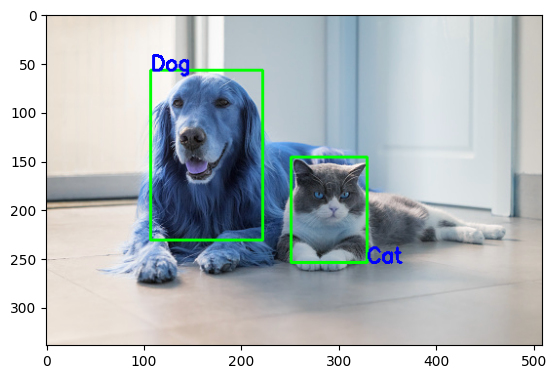

In [66]:
import matplotlib.pyplot as plt
import cv2
path = r'D:\ML1BootCamp\Day9_filehandling_imageAnotation\new\6.txt'


imgpath = r'D:\ML1BootCamp\Day9_filehandling_imageAnotation\cat_dog\6.jpeg'  # Replace with the correct image file extension
img = cv2.imread(imgpath)

with open(path, 'r') as file:
    annotations = file.readlines()
    #print(annotations)

    for anotation in annotations:
        parts = anotation.split()
        label,x_center, y_center, width, height = map(float,parts[:])
       
        img_height, img_width, _ = img.shape
        x1 = int((x_center - width / 2) * img_width)
        y1 = int((y_center - height / 2) * img_height)
        x2 = int((x_center + width / 2) * img_width)
        y2 = int((y_center + height / 2) * img_height)

        cv2.rectangle(img,(x1,y1),(x2,y2),color=(0,255,0),thickness=2)
        if int(label) == 0:
            text = 'Dog'
            write(img,text,x1,y1)
        if int(label) == 1:
            text = 'Cat'
            write(img,text,x2,y2)

    plt.imshow(img)
    plt.show()
    

        